In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Microscopic level

In [3]:
df_microscopic= pd.read_csv('microscopic_topological measures.csv')
df_microscopic

,subject,node,global_efficiency,local_efficiency,degree,degree_density,clustering_coefficient,betweenness_centrality,strength,anatomical_location,lobe,hemisphere
0,12,0,0.260726,0.552694,4.0,0.125000,0.081554,0.131048,1.401722,Cuneus_L,Occipital,L
1,12,1,0.260726,0.552694,1.0,0.031250,0.000000,0.000000,0.365050,Cuneus_L,Occipital,L
2,12,2,0.260726,0.552694,1.0,0.031250,0.000000,0.000000,0.353318,Occipital_Sup_L,Occipital,L
3,12,3,0.260726,0.552694,4.0,0.125000,0.327706,0.032258,1.779783,Cuneus_L,Occipital,L
4,12,4,0.260726,0.552694,6.0,0.187500,0.228695,0.050403,2.409319,Frontal_Sup_Medial_L,Frontal,L
...,...,...,...,...,...,...,...,...,...,...,...,...
3412,98,58,0.457431,0.504721,3.0,0.090909,0.358873,0.007576,1.450415,Precentral_R,Frontal,R
3413,98,59,0.457431,0.504721,4.0,0.121212,0.069127,0.049242,1.790528,Frontal_Inf_Oper_R,Frontal,R
3414,98,60,0.457431,0.504721,3.0,0.090909,0.180129,0.007576,1.399714,Rolandic_Oper_R,Parietal,R
3415,98,61,0.457431,0.504721,6.0,0.181818,0.206329,0.113636,2.217607,Angular_R,Parietal,R


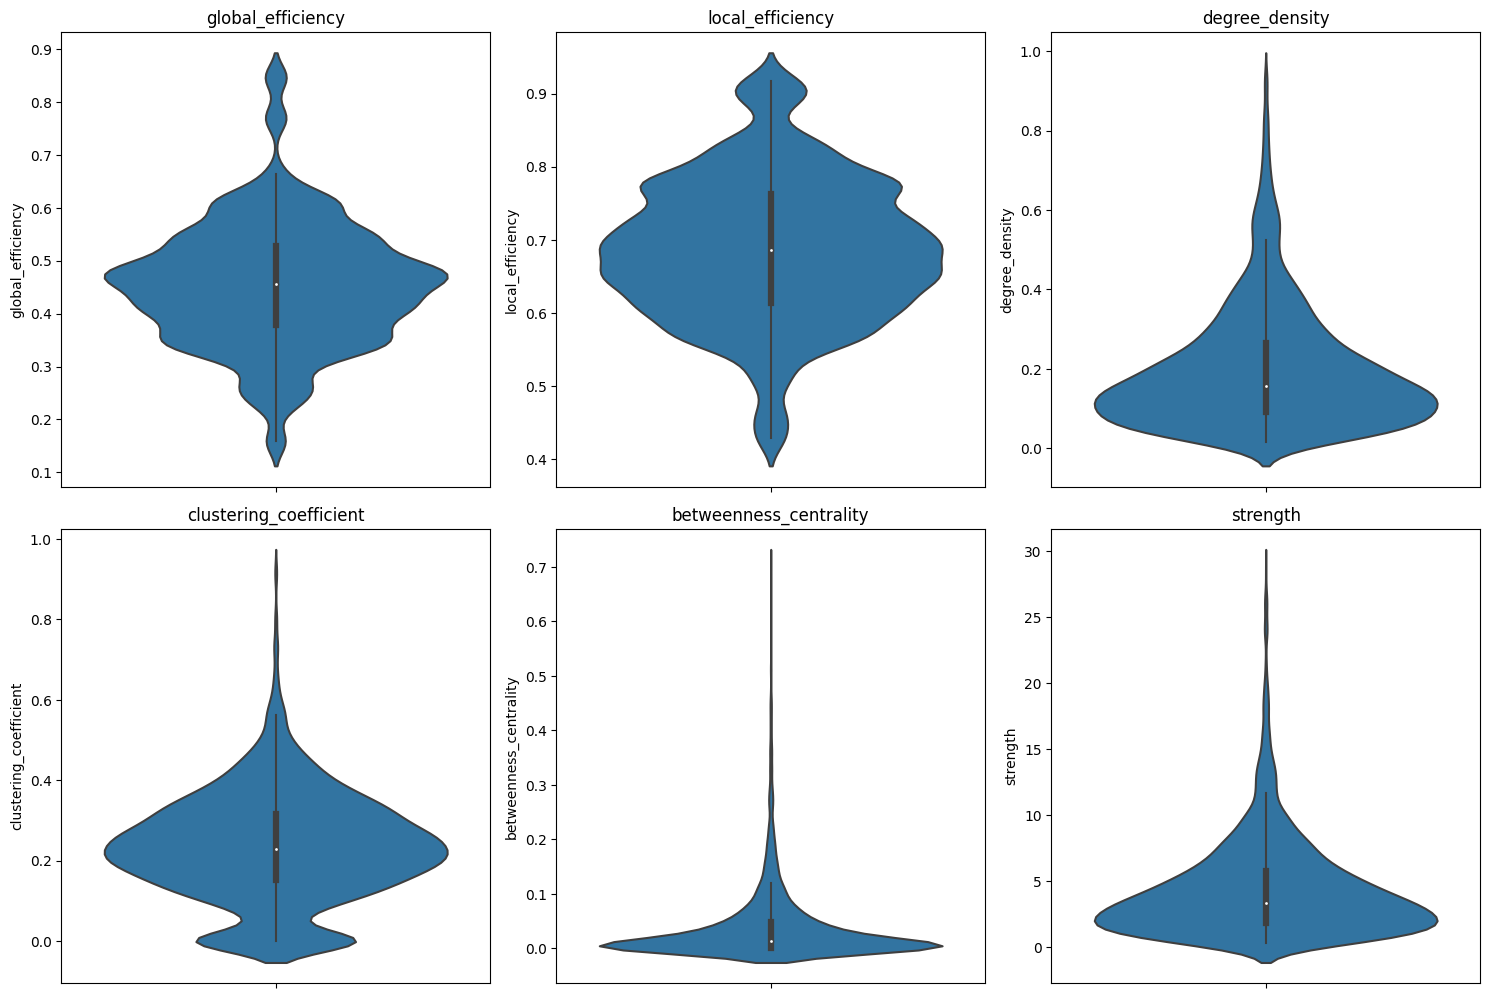

In [11]:
# Filter for numeric columns only, excluding 'subject' and 'node'
numeric_columns = df_microscopic.select_dtypes(include=['number']).drop(columns=['subject', 'node','degree']).columns

# Set up the figure size and layout
plt.figure(figsize=(15, 15))

# Loop over each numeric column in the DataFrame and create a violin plot
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    sns.violinplot(y=df_microscopic[column])
    plt.title(column)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

## Mesoscopic level

In [13]:
df_mesoscopic= pd.read_csv('mesoscopic_properties.csv')

In [14]:
df_mesoscopic

,lobe,hemisphere,node,global_efficiency,local_efficiency,degree,clustering_coefficient,betweenness_centrality,strength
0,Frontal,L,13.814969,0.454476,0.686769,9.591476,0.241022,0.041378,4.733044
1,Frontal,R,45.723864,0.457167,0.690730,9.211364,0.243982,0.039501,4.567636
2,Occipital,L,9.884058,0.450565,0.691312,8.293996,0.267092,0.036632,4.496361
3,Occipital,R,39.242938,0.454570,0.689259,8.559322,0.256488,0.037720,4.543073
4,Parietal,L,24.897727,0.445539,0.670366,7.348485,0.194935,0.040173,3.349679
5,Parietal,R,57.706767,0.457096,0.683102,8.150376,0.172222,0.039351,3.772155
6,Temporal,L,30.457944,0.461339,0.684605,7.121495,0.182530,0.039134,3.265652
7,Temporal,R,62.435644,0.461251,0.680941,6.821782,0.160695,0.031708,3.174022


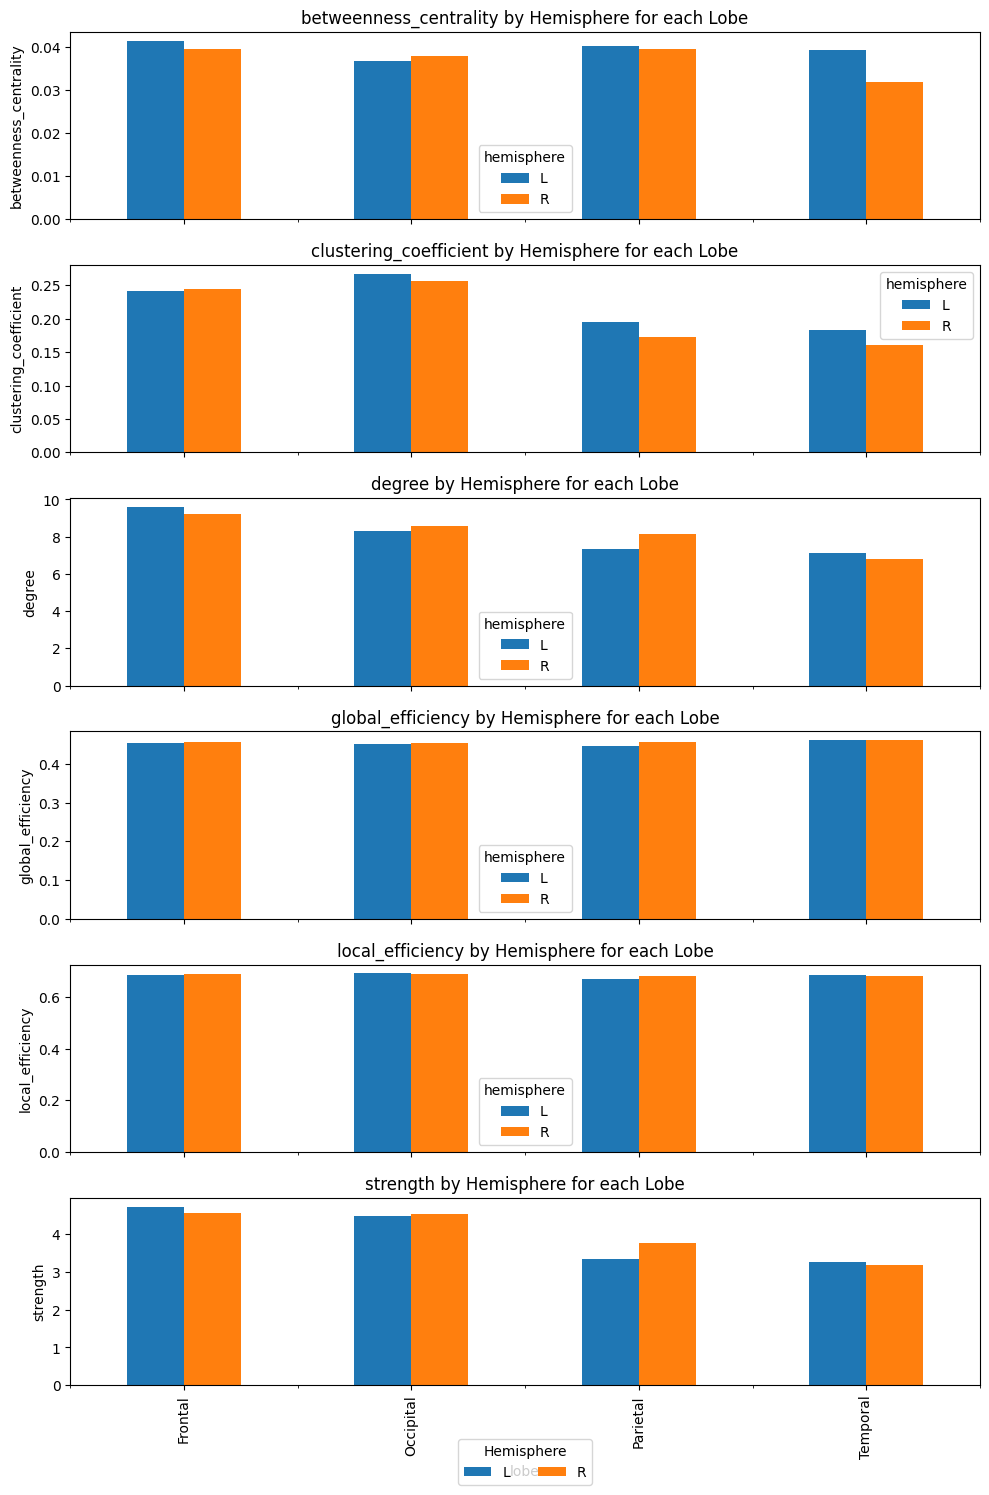

In [15]:
def plot_lobes_bar(df):
    # Exclude 'subject' and 'node' columns
    metrics = df.columns.difference(['subject', 'node', 'lobe', 'hemisphere'])
    lobes = df['lobe'].unique()
    
    # Pivot the DataFrame on 'lobe' and 'hemisphere'
    df_pivot = df.pivot(index='lobe', columns='hemisphere')

    # Create subplots
    fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 15), sharex=True)
    
    # Plot each metric
    for i, metric in enumerate(metrics):
        df_pivot[metric].plot(kind='bar', ax=axes[i])
        axes[i].set_ylabel(metric)
        axes[i].set_title(f'{metric} by Hemisphere for each Lobe')
    
    # Adjust the legend and layout
    axes[-1].legend(title='Hemisphere', loc='upper center', ncol=2, bbox_to_anchor=(0.5, -0.25))
    plt.tight_layout()
    plt.show()

# Plot the bar graph
plot_lobes_bar(df_mesoscopic)

## Macroscopic level

In [2]:
df_macroscopic= pd.read_csv('macroscopic_properties.csv')

In [3]:
df_macroscopic

,subject,node,global_efficiency,local_efficiency,degree,degree_density,clustering_coefficient,betweenness_centrality,strength
0,12,25.757576,0.260726,0.552694,3.575758,0.111742,0.228683,0.032991,1.668256
1,13,30.468085,0.320154,0.658336,4.297872,0.093432,0.252247,0.078199,2.134799
2,14,33.740741,0.481761,0.716887,8.296296,0.156534,0.159564,0.030277,4.070918
3,15,31.744186,0.483861,0.582839,8.279070,0.197121,0.141935,0.030116,3.720559
4,16,30.762712,0.454432,0.688972,8.644068,0.149036,0.245438,0.031848,3.993715
...,...,...,...,...,...,...,...,...,...
75,94,29.833333,0.480026,0.713423,7.888889,0.225397,0.234156,0.037862,4.269881
76,95,30.946429,0.615184,0.775684,16.571429,0.301299,0.248870,0.018086,7.832750
77,96,28.957447,0.433210,0.560206,6.000000,0.130435,0.183461,0.043643,2.981635
78,97,31.157895,0.456700,0.647276,8.350877,0.149123,0.182259,0.034165,4.169841


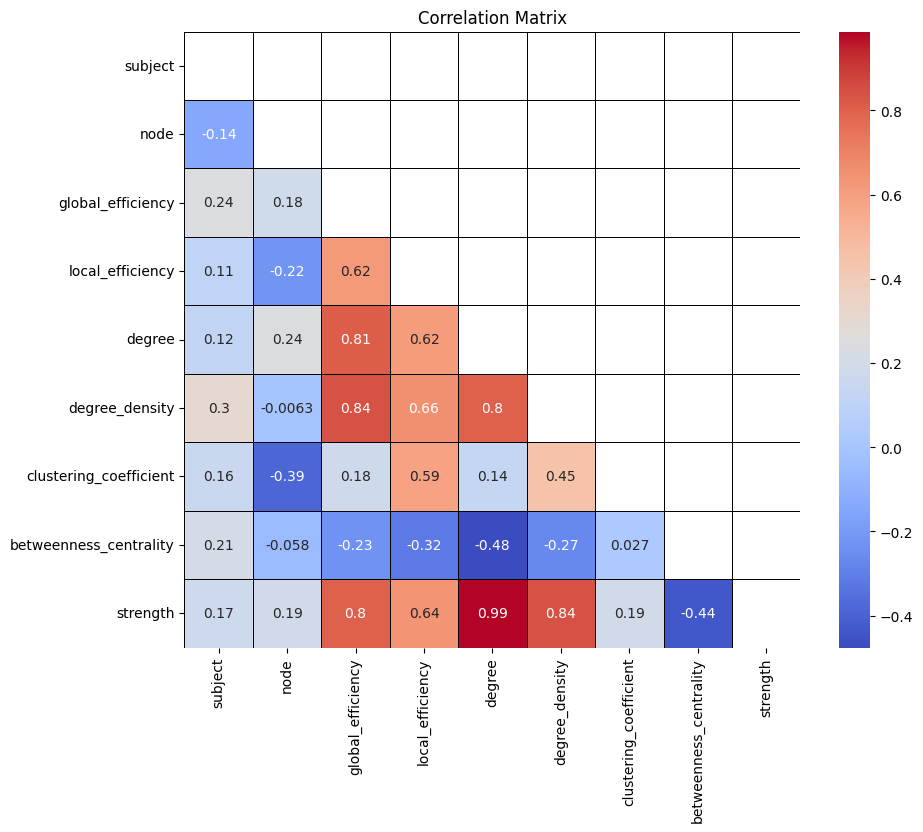

In [4]:
corr = df_macroscopic.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask, square=True, linewidths=0.5, linecolor='black')

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

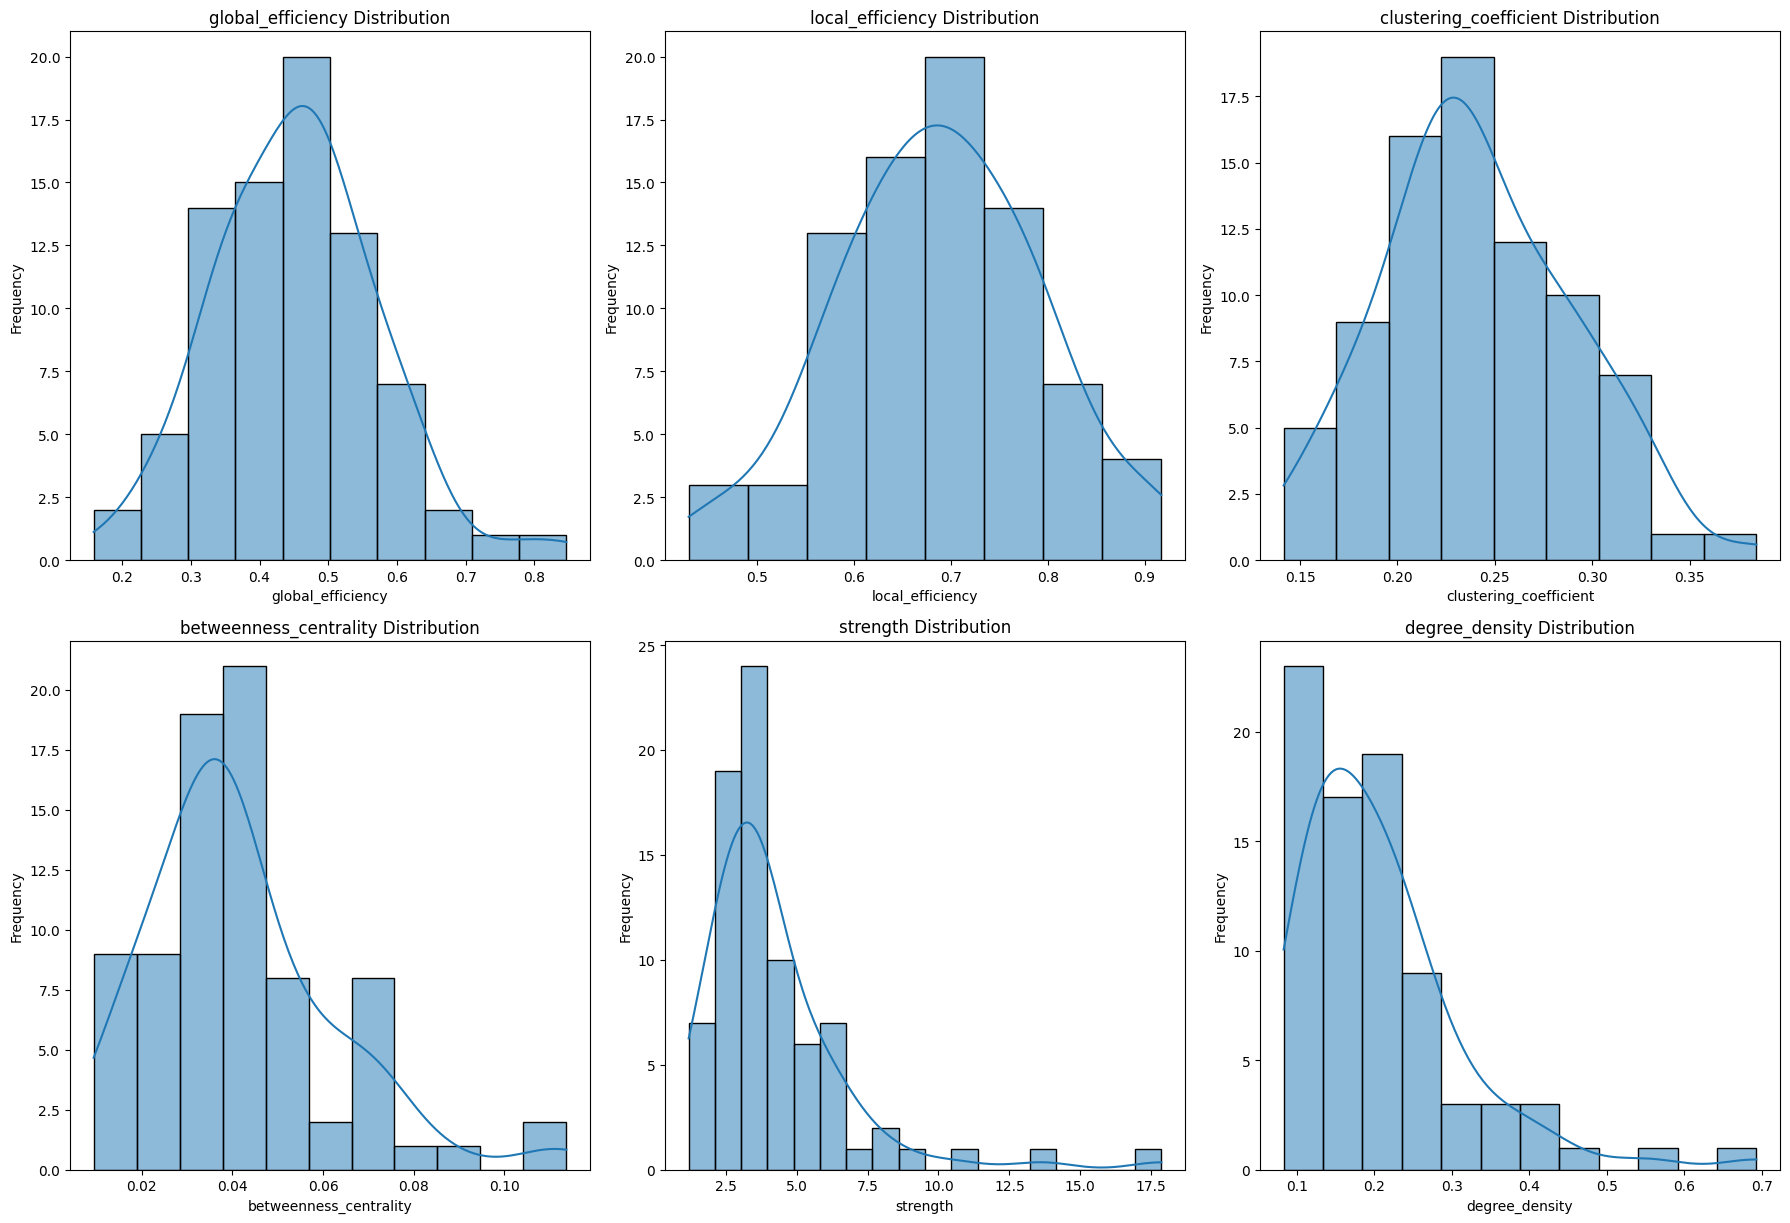

In [23]:
metrics = ['global_efficiency', 'local_efficiency', 'clustering_coefficient', 
           'betweenness_centrality', 'strength', 'degree_density']

plt.figure(figsize=(18, 18))

for i, metric in enumerate(metrics):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_macroscopic[metric], kde=True)
    plt.title(f'{metric} Distribution')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()